In [7]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


In [11]:
import zipfile
with zipfile.ZipFile('data.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('.')
data = pd.read_csv("data.csv", encoding="latin1")
data = data[['no2']].dropna()
x = data['no2'].values

/tmp/ipython-input-3937999766.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data.csv", encoding="latin1")


In [12]:
r = 102317142

a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)


In [13]:
z = x + a_r * np.sin(b_r * x)


In [14]:
def pdf(z, c, mu, sigma):
    return c * np.exp(-((z - mu) ** 2) / (2 * sigma ** 2))


In [15]:
hist, bins = np.histogram(z, bins=50, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2


In [16]:
initial_guess = [1, np.mean(z), np.std(z)]
params, _ = curve_fit(pdf, bin_centers, hist, p0=initial_guess)

c, mu, sigma = params


In [17]:
initial_guess = [1, np.mean(z), np.std(z)]
params, _ = curve_fit(pdf, bin_centers, hist, p0=initial_guess)

c, mu, sigma = params


In [18]:
print("c =", round(c, 5))
print("mu =", round(mu, 5))
print("sigma =", round(sigma, 5))


c = 0.0268
mu = 19.63078
sigma = 15.59434


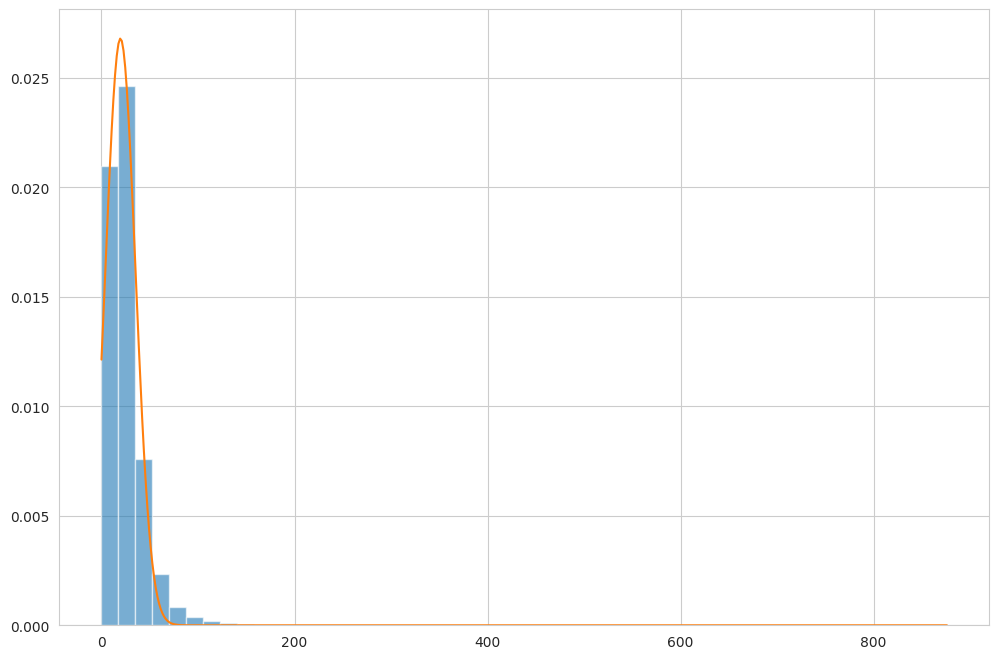

In [19]:
z_range = np.linspace(min(z), max(z), 500)
plt.hist(z, bins=50, density=True, alpha=0.6)
plt.plot(z_range, pdf(z_range, c, mu, sigma))
plt.show()
